In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# !ls "/content/drive/MyDrive/Colab Notebooks/"

In [3]:
# !unzip "/content/drive/MyDrive/Colab Notebooks/out_DS_Qus 2.zip" -d "/content/drive/MyDrive/Colab Notebooks/"

In [4]:
PATH = "/content/drive/MyDrive/Colab Notebooks/out.csv"

In [5]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import pickle
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
np.random.seed(500)

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
data = pd.read_csv(PATH, nrows=80000) # Loading only 80k samples 

In [7]:
data.head(2)

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,Message,FeedText,FeedDescription,FeedTitle,postImgUrl,postImgUrlOriginal,videoTitle,VideoSiteRedirectionUrl,VideoDescription,PostRedirectionImg,websiteUrl,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,DestinationURL,savePostDateTimeUtc,mediaPostUrlUpdated,CommentDetails,HashTag
0,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2171117736262189""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Youre about to GET LUCKY! Rise and shine. HAP...,Youre about to GET LUCKY! Rise and shine. HAPP...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528458840,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
1,"{""$oid"":""5b1aa7ee8bb55b300895a777""}",5b1aa7ee8bb55b300895a776,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170670772973552""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...","Rest up, tomorrows a BIG DAY.\r\n You&#039;re ...",NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528428573,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN


# Data PreProcessing

#### Data Describe 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      80000 non-null  object 
 1   Id                       80000 non-null  object 
 2   GroupId                  80000 non-null  object 
 3   GroupName                80000 non-null  object 
 4   PostId                   80000 non-null  object 
 5   PostType                 80000 non-null  object 
 6   UserProfileId            80000 non-null  int64  
 7   ProfileName              80000 non-null  object 
 8   ProfileImage             80000 non-null  object 
 9   ProfileImageOriginal     80000 non-null  object 
 10  Message                  80000 non-null  object 
 11  FeedText                 62720 non-null  object 
 12  FeedDescription          39418 non-null  object 
 13  FeedTitle                22666 non-null  object 
 14  postImgUrl            

In [9]:
# Droping Null columns
data = data.drop(columns=['videoTitle','VideoSiteRedirectionUrl', 'VideoDescription', 'PostRedirectionImg','websiteUrl','CommentDetails','HashTag'])

In [10]:
data = data.dropna() # Droping null rows

In [11]:
# Taking Usefull columns only
df = data[['Message','FeedText','FeedDescription','FeedTitle']] # taking text features only

In [12]:
df.head(2)

,Message,FeedText,FeedDescription,FeedTitle
13390,https://start.s. Hope this video will be helpf...,Hope this video will be helpful for those who ...,RESTFulAPI/Web Services(User Registration APIs...,https://start.s.
13392,msaad1999 (Muhammad Saad ) -\-\-\-\-\-\-\-\-\-...,-\-\-\-\-\-\-\-\-\-\-\-\-Check Out My Games (a...,msaad1999 has 2 repositories available. Follow...,msaad1999 (Muhammad Saad )


 #### Text Cleaning and Filtering 

In [13]:
def pattern(text, pattern_regex):
    
    return " ".join(re.findall(pattern_regex, text))

In [14]:
# We are keeping cleaned text in a new column 
for i in range(len(df.columns)):
  df["New_"+df.columns[i]] = np.vectorize(pattern)(df[df.columns[i]], "[a-zA-Z]+")

In [15]:
df.drop(columns=df.columns[:4],inplace=True) # droping unwanted features

In [16]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [17]:
# We are keeping cleaned Text in a new column
for i in range(len(df.columns)):
  df["new_"+df.columns[i][4:]] = np.vectorize(remove_pattern)(df[df.columns[i]], ' *https* | *www* | *com* ')

In [18]:
df.drop(columns=df.columns[:4],inplace=True) # droping unwanted features

In [19]:
df.shape

(14180, 4)

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(12540, 4)

In [22]:
df = df.reset_index(drop=True)

In [23]:
df.columns

Index(['new_Message', 'new_FeedText', 'new_FeedDescription', 'new_FeedTitle'], dtype='object')

#### StopWords

In [24]:
stopwords_set = set(stopwords.words('english'))
cleaned_txt0, cleaned_txt1, cleaned_txt2, cleaned_txt3 = [], [], [], []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords_0 = [word for word in row.new_Message.split() if not word in stopwords_set and '#' not in word.lower()]
    # finally creating txt list of tuples containing stopwords(list) and sentimentType 
    cleaned_txt0.append(' '.join(words_without_stopwords_0))

    words_without_stopwords_1 = [word for word in row.new_FeedText.split() if not word in stopwords_set and '#' not in word.lower()]
    # finally creating txt list of tuples containing stopwords(list) and sentimentType 
    cleaned_txt1.append(' '.join(words_without_stopwords_1))

    words_without_stopwords_2 = [word for word in row.new_FeedDescription.split() if not word in stopwords_set and '#' not in word.lower()]
    # finally creating txt list of tuples containing stopwords(list) and sentimentType 
    cleaned_txt2.append(' '.join(words_without_stopwords_2))

    words_without_stopwords_3 = [word for word in row.new_FeedTitle.split() if not word in stopwords_set and '#' not in word.lower()]
    # finally creating txt list of tuples containing stopwords(list) and sentimentType 
    cleaned_txt3.append(' '.join(words_without_stopwords_3))

    
df[df.columns[0]] = cleaned_txt0
df[df.columns[1]] = cleaned_txt1
df[df.columns[2]] = cleaned_txt2
df[df.columns[3]] = cleaned_txt3

In [25]:
df.head(2)

,new_Message,new_FeedText,new_FeedDescription,new_FeedTitle
0,start Hope video helpful interested Spring Boo...,Hope video helpful interested Spring Boot Rest...,RESTFulAPI Web Services User Registration APIs...,start
1,msaad Muhammad Saad Check Out My Games STAR I ...,Check Out My Games STAR I created Game project...,msaad repositories available Follow code GitHub,msaad Muhammad Saad


#### Tokenization and Lemmatization

In [26]:
for i in range(len(df.columns)):
  df['tokenized_'+df.columns[i]] = df[df.columns[i]].apply(lambda x: x.split())

In [27]:
df.drop(columns=df.columns[:4],inplace=True) # droping unwanted features

In [28]:
word_lemmatizer = WordNetLemmatizer()
for i in range(len(df.columns)):
  df['Lemmatize_'+df.columns[i]] = df[df.columns[i]].apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

In [29]:
df.drop(columns=df.columns[:4],inplace=True) # droping unwanted features

In [30]:
v = []
for i, tokens in enumerate(df[df.columns[1]]):
  v.append(' '.join(tokens))

In [31]:
def token(j):
  val = []
  for i, tokens in enumerate(df[df.columns[j]]):
      val.append(' '.join(tokens))

  df[df.columns[j][20:]] = val

In [32]:
for k in range(len(df.columns)):
  token(k)

In [33]:
df.drop(columns=df.columns[:4],inplace=True)

In [34]:
df.head(2)

,new_Message,new_FeedText,new_FeedDescription,new_FeedTitle
0,start Hope video helpful interested Spring Boo...,Hope video helpful interested Spring Boot Rest...,RESTFulAPI Web Services User Registration APIs...,start
1,msaad Muhammad Saad Check Out My Games STAR I ...,Check Out My Games STAR I created Game project...,msaad repository available Follow code GitHub,msaad Muhammad Saad


## Data Annotation Using KMeans


#### DataSet is very large, SO taking one columns for Annotation

In [35]:
# Vector Transose FeedText
data = df['new_FeedText']
tf_idf_vectorizor = TfidfVectorizer()
%time tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

CPU times: user 411 ms, sys: 6.67 ms, total: 417 ms
Wall time: 430 ms


In [36]:
tf_idf_array.shape

(12540, 39084)

CPU times: user 278 ms, sys: 224 ms, total: 502 ms
Wall time: 278 ms


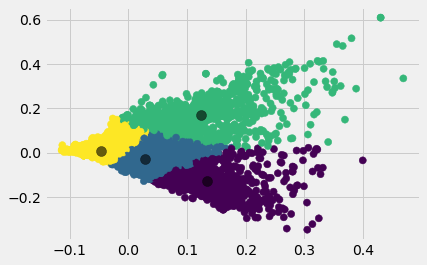

In [37]:
from sklearn.cluster import KMeans

n_clusters = 4 # For 4 classes

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
Y_slearn = tf_idf_array
kmeans = KMeans(n_clusters= n_clusters, max_iter=6000, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=100, alpha=0.6);

In [38]:
data = {'FeedText':df['new_FeedText'],
        'Prediction':prediction}
t = pd.DataFrame(data)

In [39]:
t['Prediction'].value_counts()

3    7480
1    3077
0    1049
2     934
Name: Prediction, dtype: int64

## Analizing Cluster classes into lables

In [40]:
t[t['Prediction'] == 0]['FeedText'] # Buyer

115      Looking For Success Minded Action Takers Who W...
165      Are looking way earn money online I listed I l...
201      Make UNLIMITED Daily Make UNLIMITED Daily You ...
229      How I make money online I product service sell...
277      Free join Travel business make money selling t...
                               ...                        
12468    Epic Battle Simulator Free Download For limite...
12469              This easiest job I ever make fast money
12478    UBEX NEW TOP RATED ICO OPPORTUNITY CHEAP ENOUG...
12480                                        best way earn
12481    Get Started Business Today NLS VIP Membership ...
Name: FeedText, Length: 1049, dtype: object

In [41]:
t[t['Prediction'] == 1]['FeedText'] # Buyer & Seller

1        Check Out My Games STAR I created Game project...
6        RECRUITMENT TO CANADA APPLY NOW Apply using li...
7        Urgent Office Assistant Dubai Jobs Apply Nowbi...
9        VACANCIES IN SCOTLAND Click Applybit ly G w M ...
11       REGISTER YOUR CV WITH CARREFOUR UAE Apply nowb...
                               ...                        
12534    Hey botfam here another great free tool toolbo...
12535    BOOM BOOM EARN WITH MASTER WALLET INDIAS BEST ...
12536    LONG TERM INVESTMENT COMPANY RUNNING DAYS SINC...
12538    Dear SIR Madam Kindly contact u need create Yo...
12539    NEW NEW NEW NEW Just launched Hourly Payment R...
Name: FeedText, Length: 3077, dtype: object

In [42]:
t[t['Prediction'] == 2]['FeedText'] # Seller

70       Get INSTANT ACCESS SEO Premium Tools Buy SEO D...
97       Get SEO ready content website business Fabrito...
99       Whatsapp Group For Digital Marketer Join This ...
104      Check top Off Page SEO technique use drive org...
107      Enhance career Digital Marketing Evergreen fie...
                               ...                        
12452    Content marketing become big part consumer eng...
12456    Hola people We Emvive give service needed Digi...
12459    Lets take look best SEO practise You enjoy rea...
12461    SEO Search Engine Optimization process improvi...
12479    AffiliateMarketing DigitalMarketing Affiliate ...
Name: FeedText, Length: 934, dtype: object

In [43]:
t[t['Prediction'] == 3]['FeedText'] # Neutral

0        Hope video helpful interested Spring Boot Rest...
2        Do know Integration Testing I wrote brief Over...
3        Todays topic Regression Testing What thought R...
4        Hope video helpful interested Spring Boot Rest...
5        Java Selenium Java Control Flow Statements Vid...
                               ...                        
12530    NewCase Study Shows PatientTrak Reduces Wait Time
12531    Hey All Looking collaborate healthcare Wellnes...
12532    An Introduction Implementing Neural Networks u...
12533    This popped feed anyone used mobile monkey FYI...
12537    Hyip Updates Daily New Hyip New paying Bots sh...
Name: FeedText, Length: 7480, dtype: object

## Model Training

In [44]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(t['FeedText'],t['Prediction'],test_size=0.3)

In [45]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(t['FeedText'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [46]:
# print(Tfidf_vect.vocabulary_)

In [47]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  76.58160552897395


In [48]:
# Classifier - Algorithm - RFC
# fit the training dataset on the classifier
RFC = RandomForestClassifier()
RFC.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_RFC = RFC.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("RFC Accuracy Score -> ",accuracy_score(predictions_RFC, Test_Y)*100)

RFC Accuracy Score ->  86.68261562998406


In [49]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  91.06858054226475


## Predicting Test Values and Saving model state

In [50]:
filename = 'SVM_model.sav'
pickle.dump(SVM, open(filename, 'wb'))

In [51]:
# Testing more than 10 samples
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Test_X_Tfidf, Test_Y)
print(result)

0.9106858054226475
